# Proyek Machine Learning Terapan

COHORT ID : MC008D5X2466  
Nama : Gabriella Yoanda Pelawi  
Email : mc008d5x2466@student.devacademy.id

## 1. Data Loading

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [142]:
df = pd.read_csv("automobile.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


## 2. Data Understanding

### 2.2 Exploratory Data Analysis
Exploratory Data Analysis (EDA) merupakan proses awal untuk menganalisis karakteristik, pola, anomali dan memeriksa asumsi pada data.

#### 2.2.1 Struktur Data

In [143]:
df.shape

(205, 26)

Data terdiri atas 26 kolom dengan 205 baris.

#### 2.2.2 Deskripsi Statistik

In [144]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [145]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [146]:
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


#### 2.2.2 Missing Values

In [147]:
# Mengubah "?" menjadi NaN
df.replace("?", np.nan, inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass

In [148]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Karena sebelumnya terdeteksi bahwa terdapat beberapa data berisi "?" maka data tersebut akan diubah menjadi NaN agar dapat diatasi. Kemudian dilakukan pengecekan missing values, ditemukan terdapat missing values pada variabel **"normalized-loses", "num-of-doors", "bore", "stroke", "horsepower", "peak-rpm"** dan **"price".**

In [149]:
mode_cols = ['compression-ratio', 'num-of-doors', 'stroke']

for col in mode_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

In [150]:
median_cols = ['price', 'engine-size', 'width', 'horsepower']

for col in median_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9196\1743195544.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_9196\1743195544.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [151]:
mean_cols = ['wheel-base', 'bore', 'highway-mpg', 'peak-rpm', 'city-mpg', 'normalized-losses', 'length']

for col in mean_cols:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9196\2939848122.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [152]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Setelah dilakukan penanganan missing values dengan mengisi data yang kosong dengan nilai mean, modus atau median dari variabel tersebut, sudah tidak ditemukan missing values pada data sehingga dapat dilakukan analisis selanjutnya.

#### 2.2.3 Data Duplikat

In [153]:
df.duplicated().sum()

0

Dilakukan pengecekan untuk melihat apakah terdapat data yang terduplikat, tetapi tidak ditemukan adanya duplikasi pada data.

#### 2.2.4 Outliers

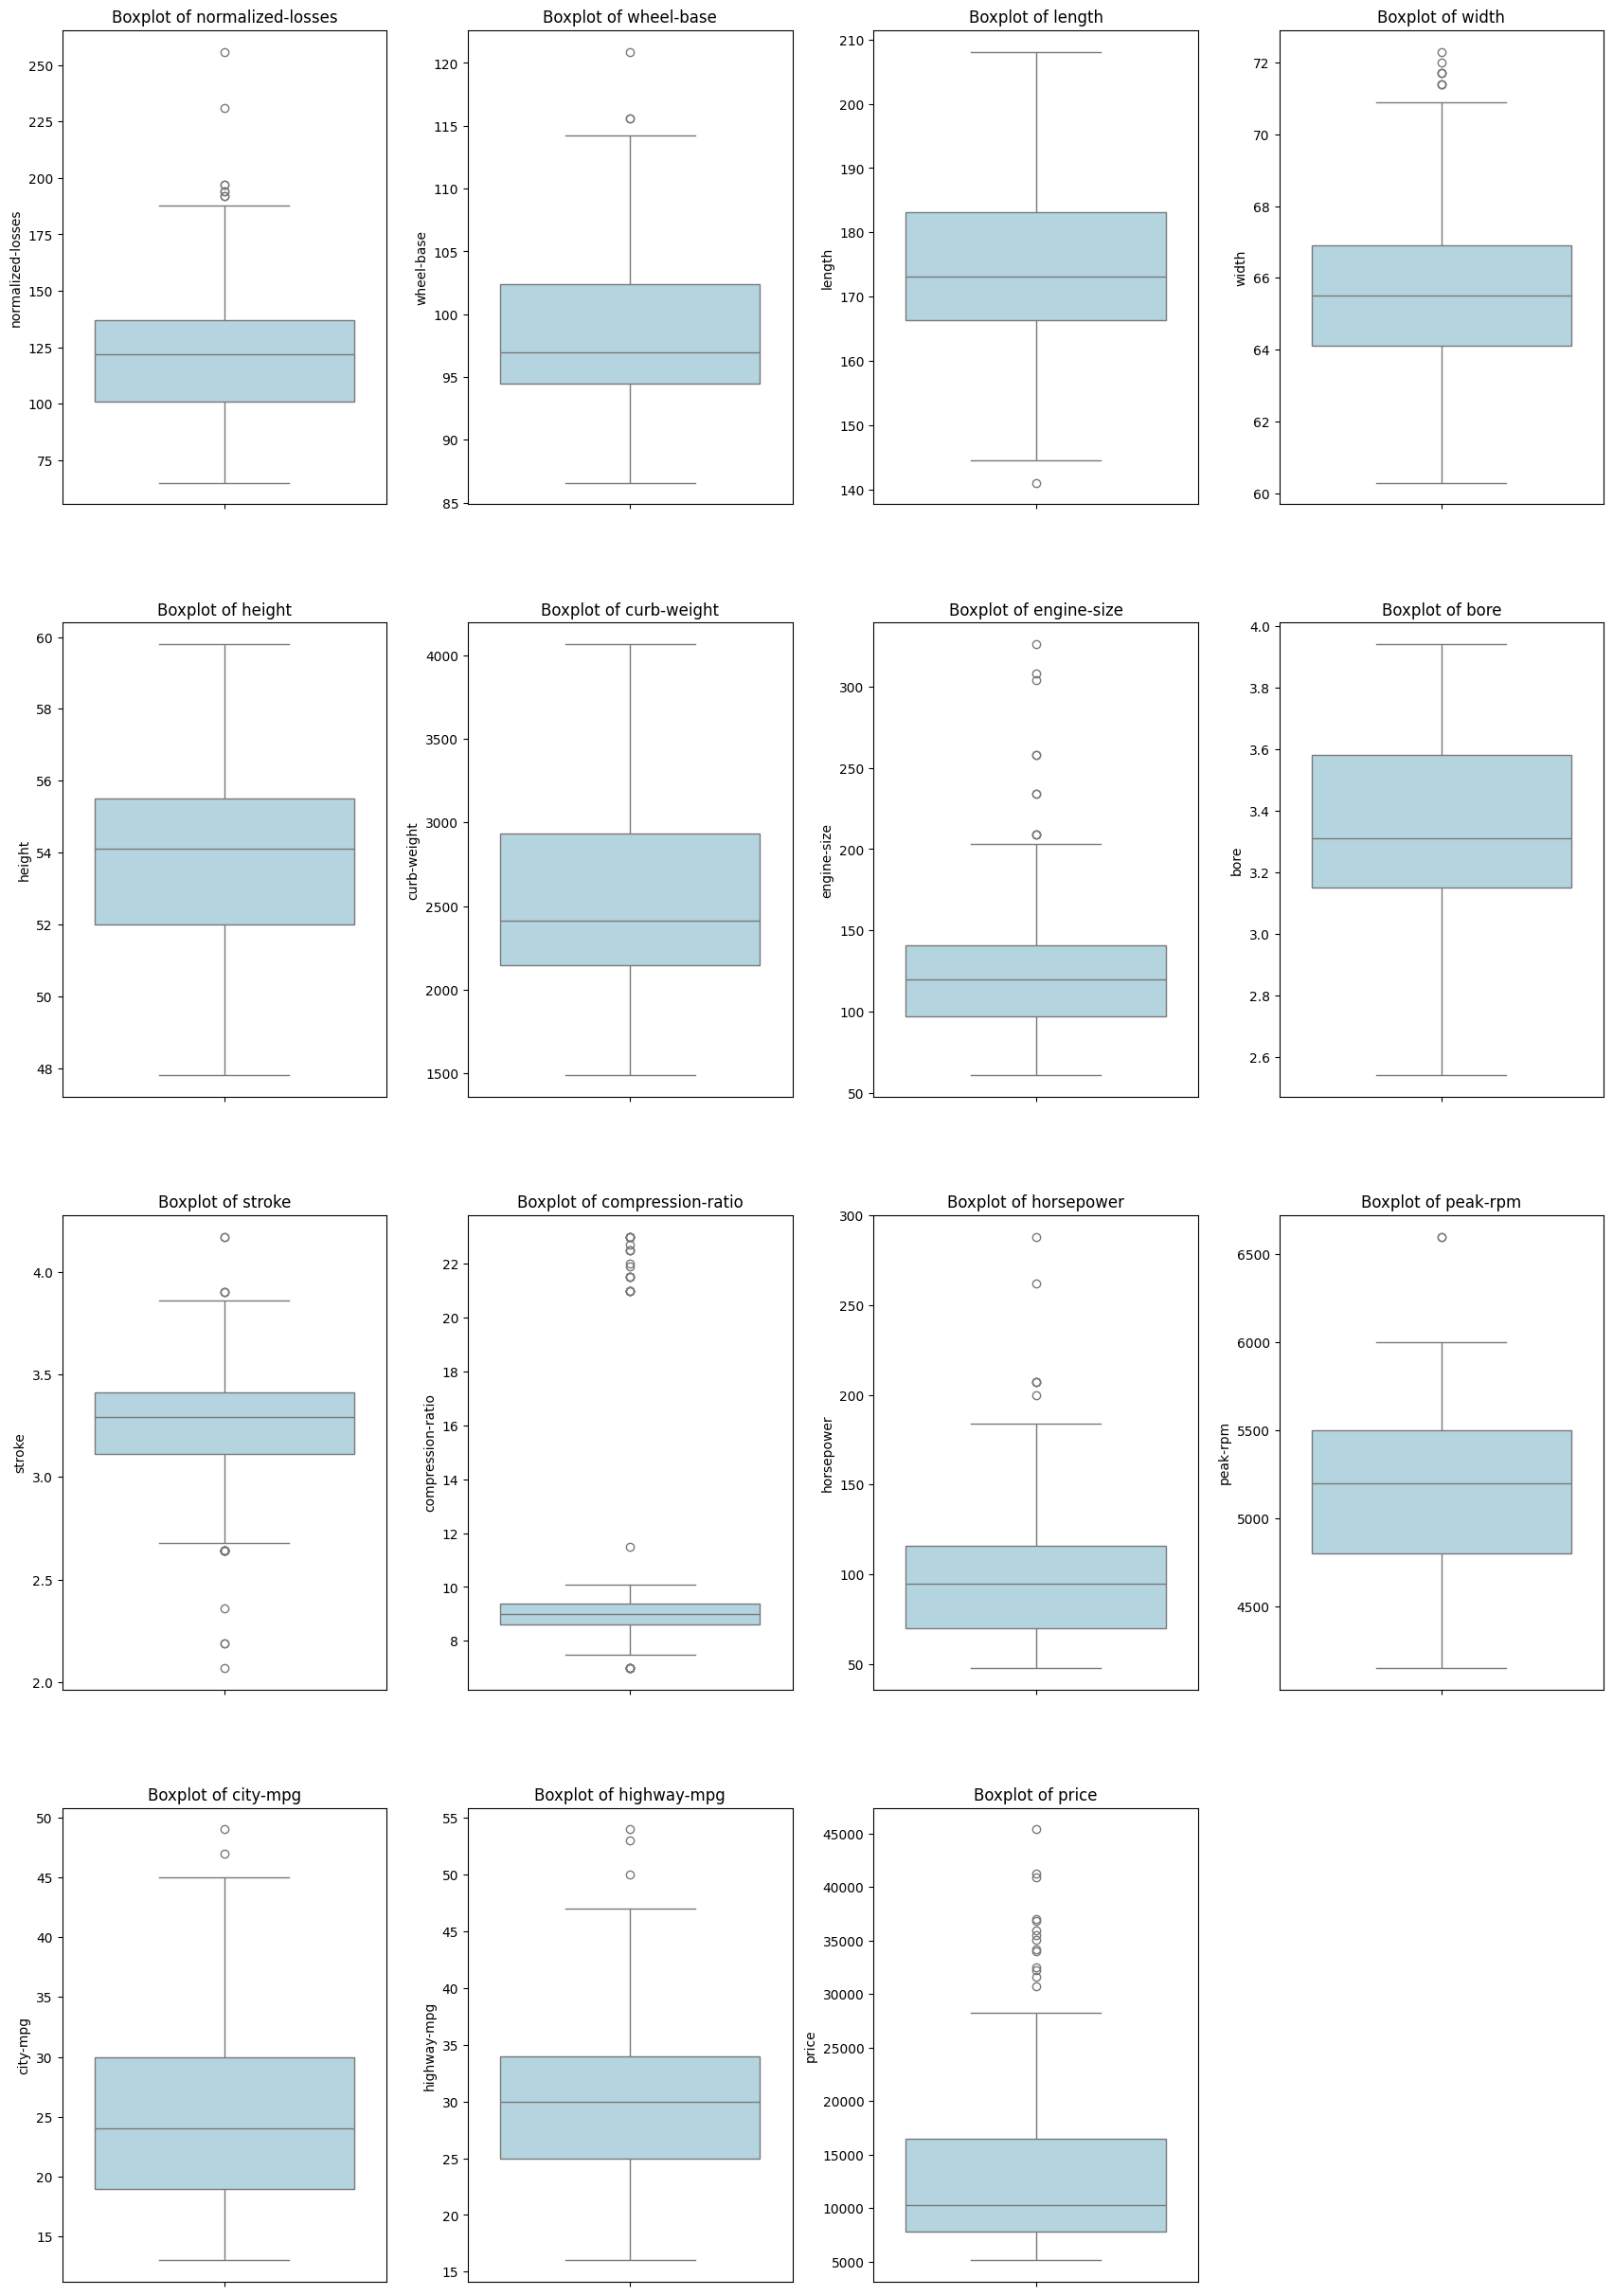

In [154]:
# Konversi kolom numerik
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(1, figsize=(21, 39)) 
n = 0

for col in numeric_cols:
    n += 1
    plt.subplot(5, 4, n)
    plt.subplots_adjust(hspace=0.25, wspace=0.25)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.show()

In [155]:
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Cek outlier di semua kolom numerik
outlier_summary = {}
for col in numeric_df.columns:
    outliers = detect_outliers_iqr(numeric_df, col)
    outlier_summary[col] = len(outliers)

# Tampilkan kolom dengan jumlah outlier
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Jumlah Outlier'])
outlier_df = outlier_df[outlier_df['Jumlah Outlier'] > 0].sort_values(by='Jumlah Outlier', ascending=False)
print(outlier_df)

                   Jumlah Outlier
compression-ratio              28
stroke                         20
price                          14
engine-size                    10
normalized-losses               8
width                           8
horsepower                      6
wheel-base                      3
highway-mpg                     3
peak-rpm                        2
city-mpg                        2
length                          1


In [156]:
for col in numeric_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

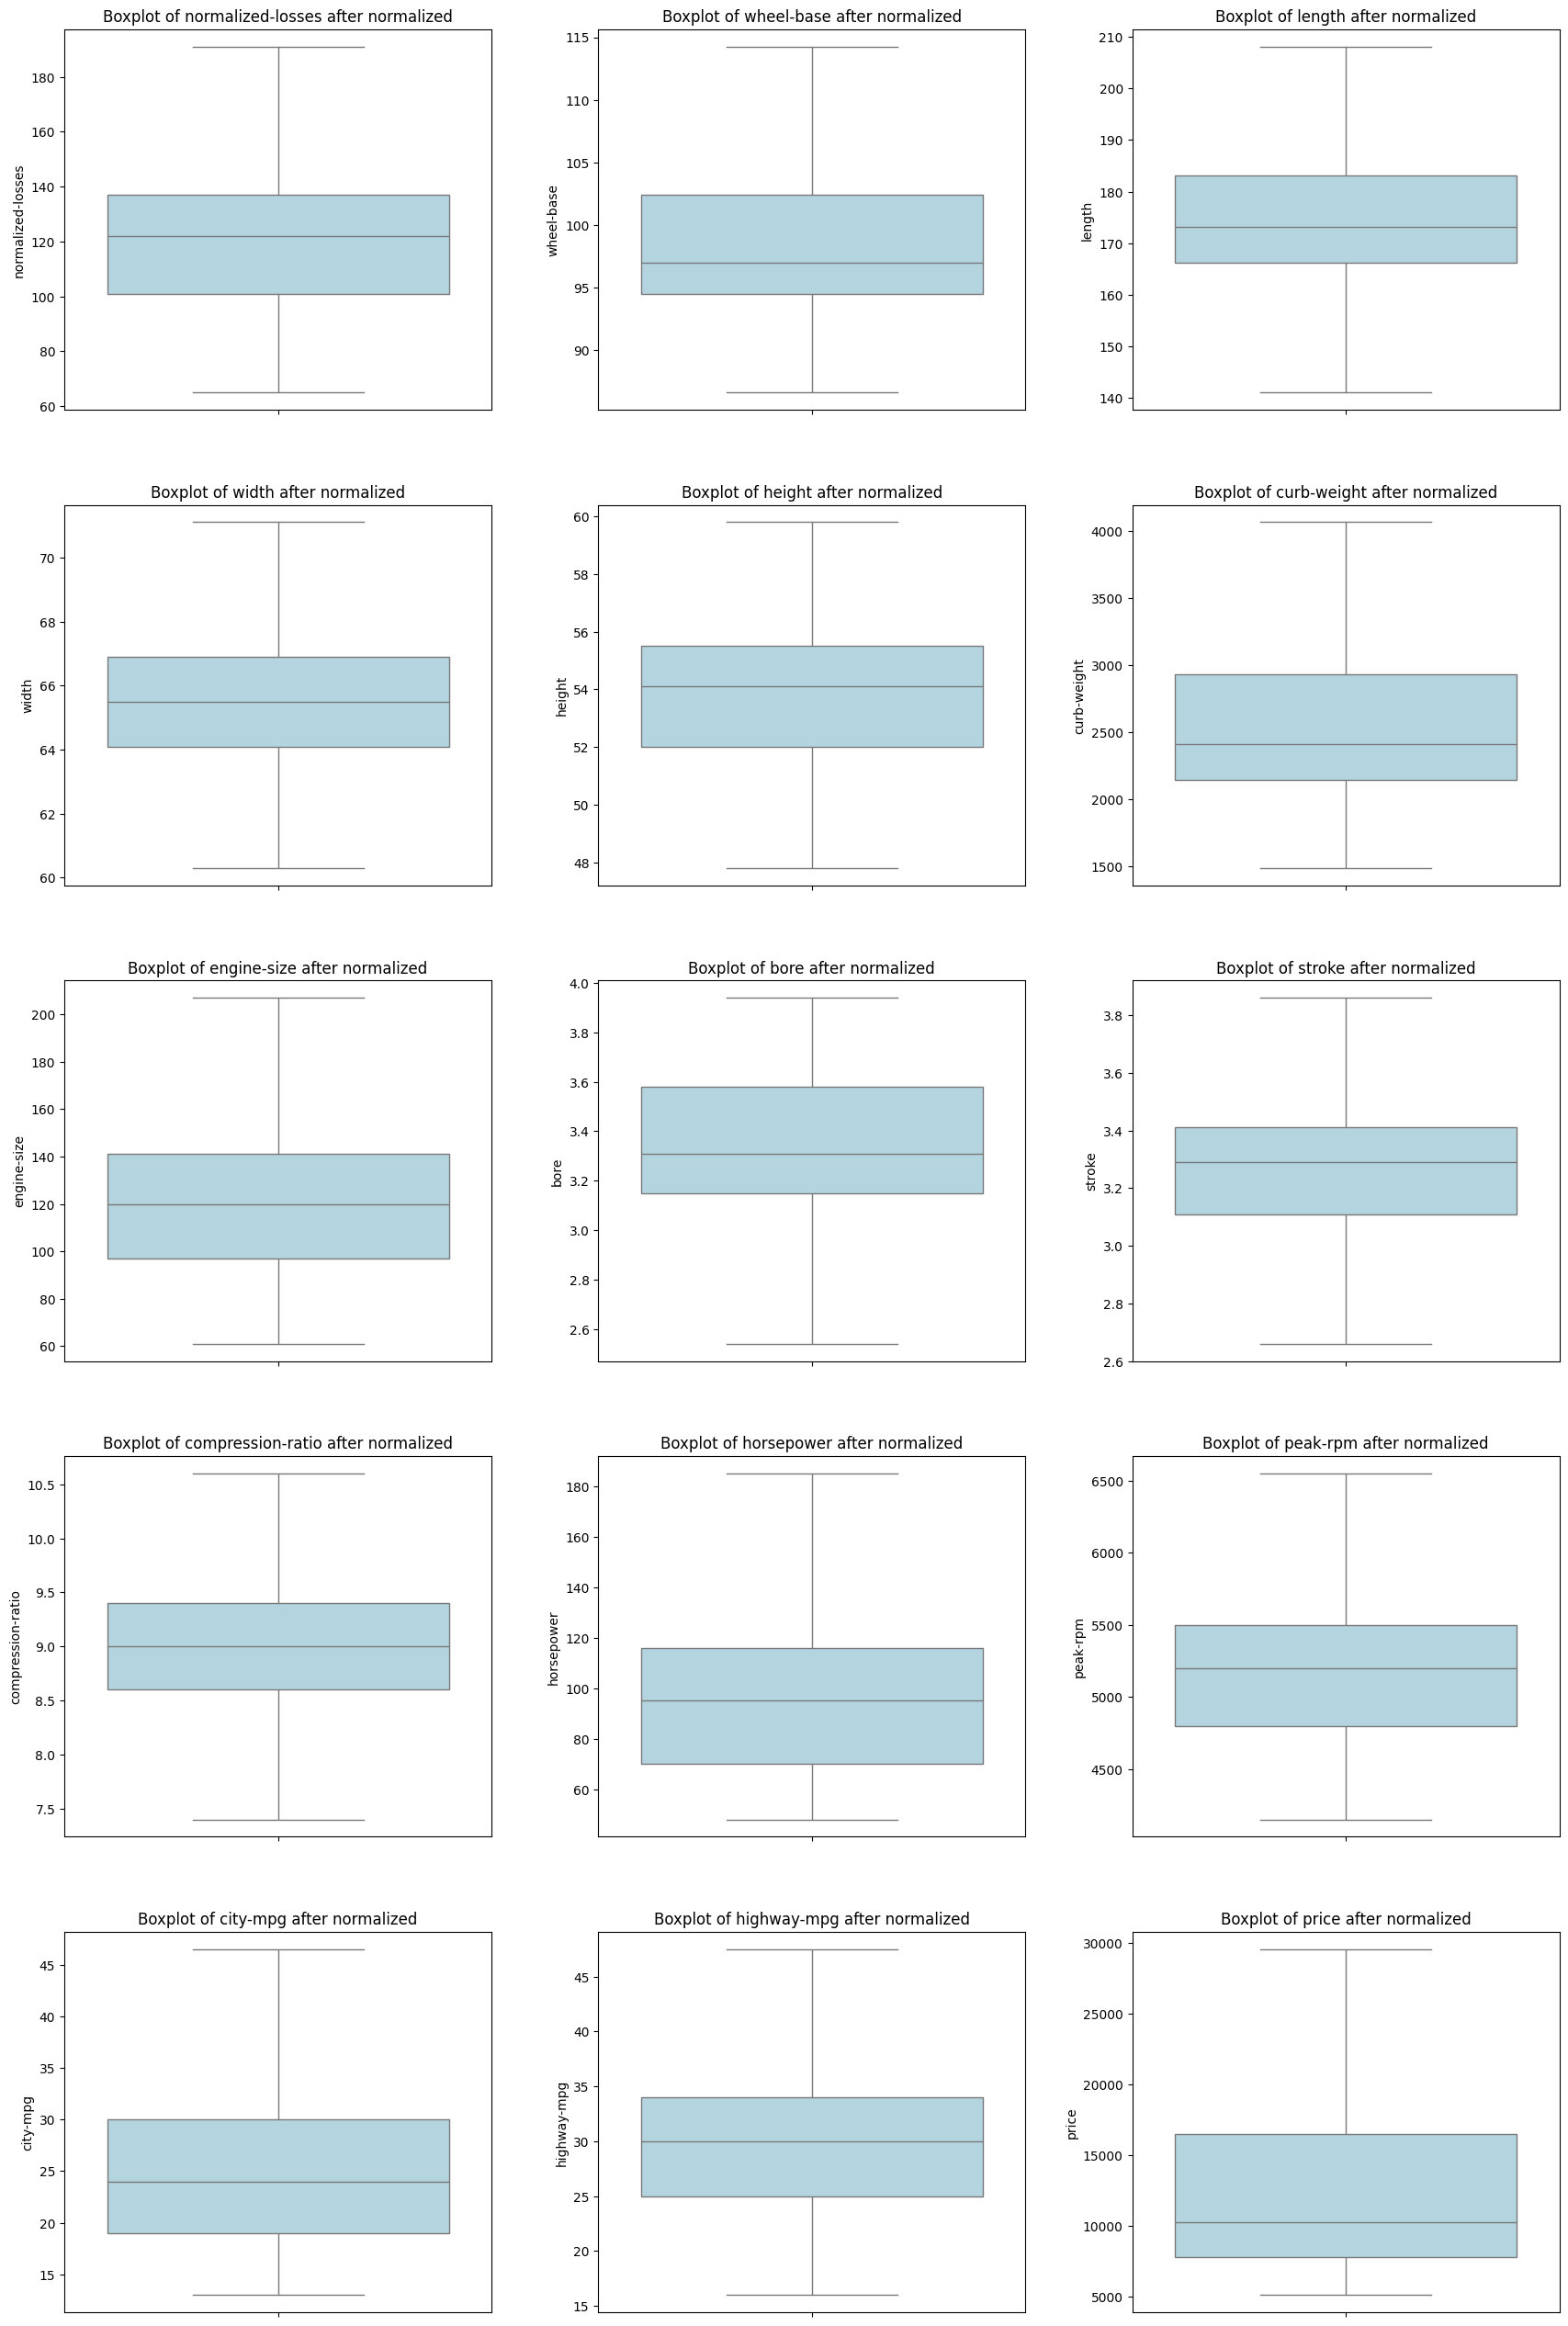

In [157]:
plt.figure(1, figsize=(21, 39)) 
n = 0

for col in numeric_cols:
    n += 1
    plt.subplot(6, 3, n)
    plt.subplots_adjust(hspace=0.25, wspace=0.25)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col} after normalized')

#### 2.2.5 Univariate Analysis

**Distribusi Risiko Mobil (symboling)**

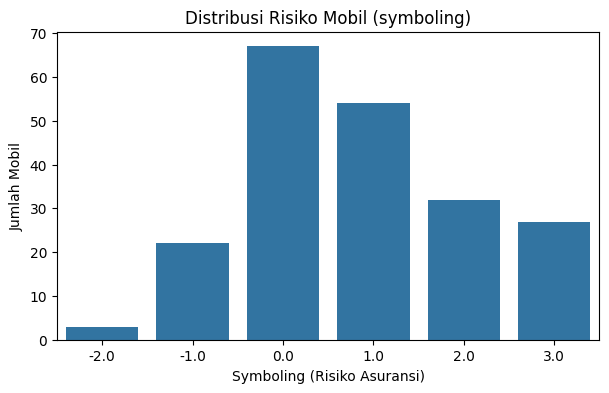

In [158]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='symboling')
plt.title("Distribusi Risiko Mobil (symboling)")
plt.xlabel("Symboling (Risiko Asuransi)")
plt.ylabel("Jumlah Mobil")
plt.show()

In [159]:
# Konversi ke 3 kelas risiko
def convert_symboling(x):
    if x <= 0:
        return "low risk"  # Risiko rendah
    elif x == 1:
        return "medium risk"  # Risiko sedang
    else:
        return "high risk"  # Risiko tinggi

df['risk_level'] = df['symboling'].apply(convert_symboling)

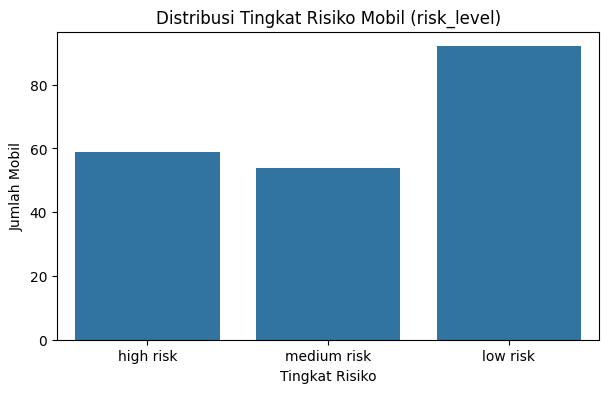

In [160]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='risk_level')
plt.title("Distribusi Tingkat Risiko Mobil (risk_level)")
plt.xlabel("Tingkat Risiko")
plt.ylabel("Jumlah Mobil")
plt.show()

**Distribusi Variabel Kategorik**

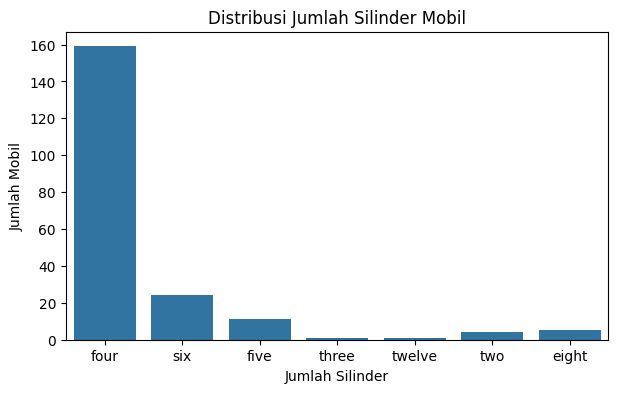

In [161]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='num-of-cylinders')
plt.title("Distribusi Jumlah Silinder Mobil")
plt.xlabel("Jumlah Silinder")
plt.ylabel("Jumlah Mobil")
plt.show()

In [162]:
# Konversi label string menjadi angka
cylinder_map = {
    'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12
}
df['num-of-cylinders'] = df['num-of-cylinders'].map(cylinder_map).astype(int)

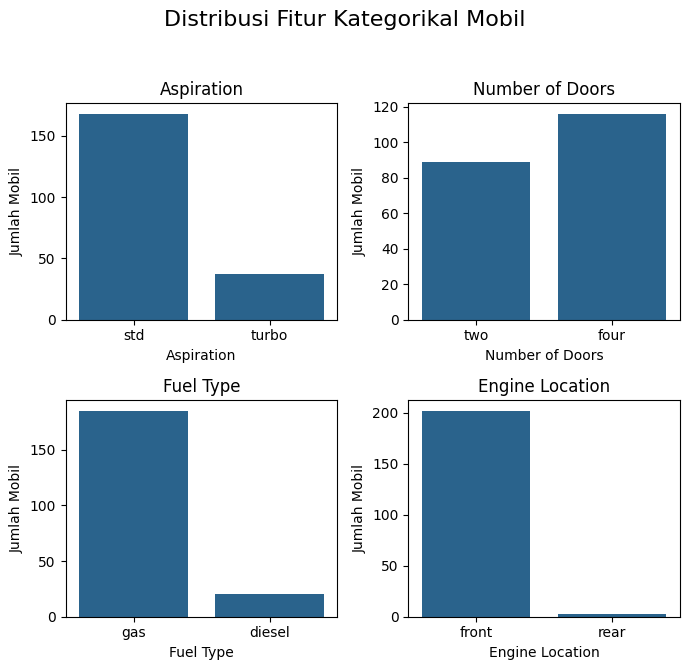

In [181]:
blue_color = "#1a669c"
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle("Distribusi Fitur Kategorikal Mobil", fontsize=16)

# Plot 1 - Aspiration
sns.countplot(data=df, x='aspiration', ax=axes[0, 0], color=blue_color)
axes[0, 0].set_title('Aspiration')
axes[0, 0].set_ylabel('Jumlah Mobil')
axes[0, 0].set_xlabel('Aspiration')

# Plot 2 - Number of Doors
sns.countplot(data=df, x='num-of-doors', ax=axes[0, 1], color=blue_color)
axes[0, 1].set_title('Number of Doors')
axes[0, 1].set_ylabel('Jumlah Mobil')
axes[0, 1].set_xlabel('Number of Doors')

# Plot 3 - Fuel Type
sns.countplot(data=df, x='fuel-type', ax=axes[1, 0], color=blue_color)
axes[1, 0].set_title('Fuel Type')
axes[1, 0].set_ylabel('Jumlah Mobil')
axes[1, 0].set_xlabel('Fuel Type')

# Plot 4 - Engine Location
sns.countplot(data=df, x='engine-location', ax=axes[1, 1], color=blue_color)
axes[1, 1].set_title('Engine Location')
axes[1, 1].set_ylabel('Jumlah Mobil')
axes[1, 1].set_xlabel('Engine Location')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

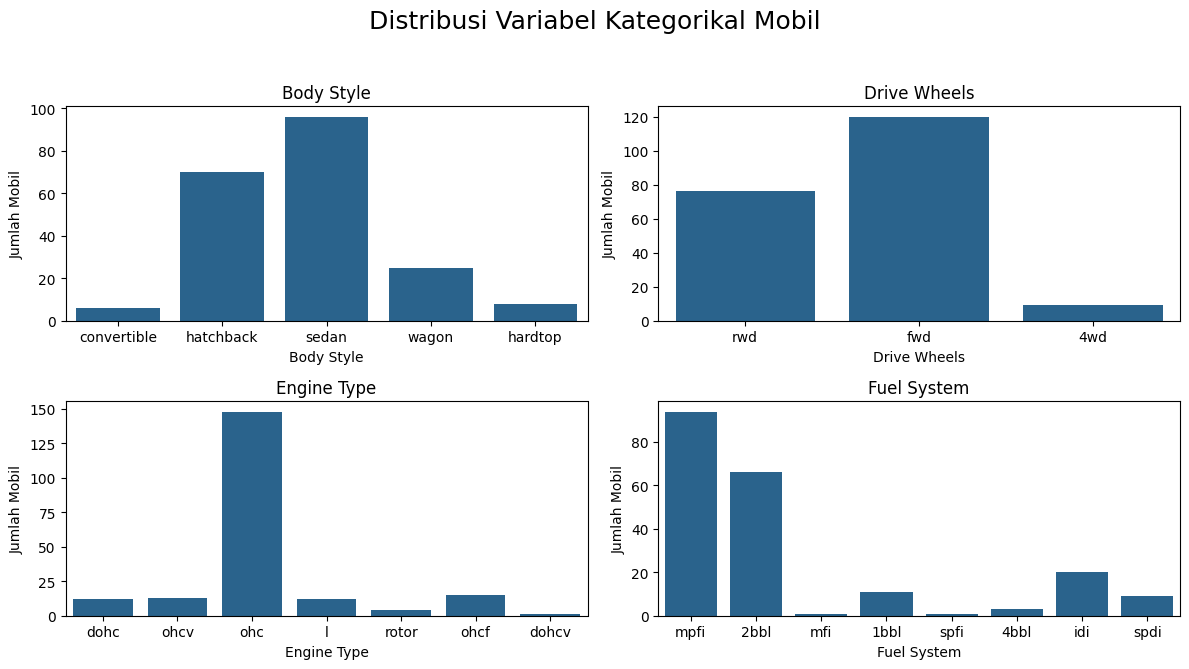

In [184]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle("Distribusi Variabel Kategorikal Mobil", fontsize=18)

# Plot 1 - Body Style
sns.countplot(data=df, x='body-style', ax=axes[0, 0], color=blue_color)
axes[0, 0].set_title('Body Style')
axes[0, 0].set_ylabel('Jumlah Mobil')
axes[0, 0].set_xlabel('Body Style')

# Plot 2 - Drive Wheels
sns.countplot(data=df, x='drive-wheels', ax=axes[0, 1], color=blue_color)
axes[0, 1].set_title('Drive Wheels')
axes[0, 1].set_ylabel('Jumlah Mobil')
axes[0, 1].set_xlabel('Drive Wheels')

# Plot 3 - Engine Type
sns.countplot(data=df, x='engine-type', ax=axes[1, 0], color=blue_color)
axes[1, 0].set_title('Engine Type')
axes[1, 0].set_ylabel('Jumlah Mobil')
axes[1, 0].set_xlabel('Engine Type')

# Plot 4 - Number of Fuel System
sns.countplot(data=df, x='fuel-system', ax=axes[1, 1], color=blue_color)
axes[1, 1].set_title('Fuel System')
axes[1, 1].set_ylabel('Jumlah Mobil')
axes[1, 1].set_xlabel('Fuel System')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### 2.2.6 Bivariate Analysis

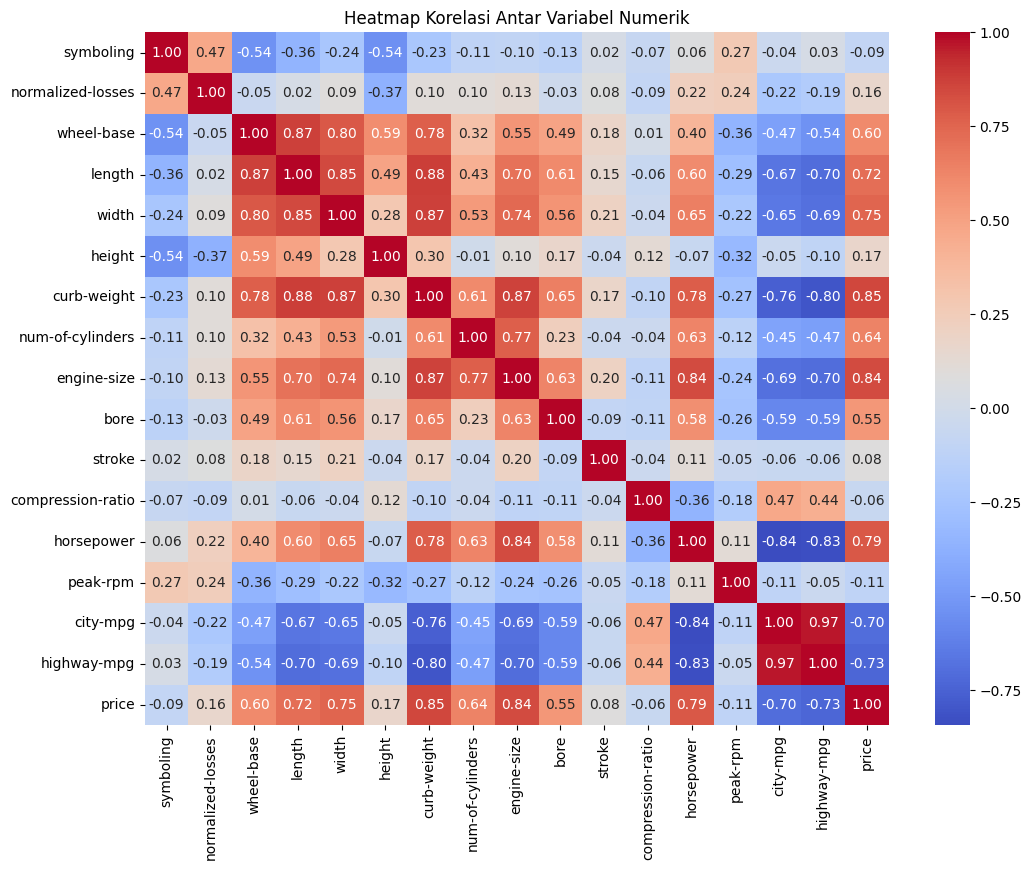

In [185]:
correlation = df.corr(numeric_only=True)
symboling_corr = correlation['symboling'].sort_values(ascending=False)

plt.figure(figsize=(12, 9))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9196\4173770850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='symboling', y=col, data=df, palette='coolwarm')
C:\Users\Acer\AppData\Local\Temp\ipykernel_9196\4173770850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='symboling', y=col, data=df, palette='coolwarm')
C:\Users\Acer\AppData\Local\Temp\ipykernel_9196\4173770850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='symboling', y=col, data=df, palette='coolwarm')
C:\Users\Acer\AppData\Local\Temp\ipykernel_9196\4173770850.py

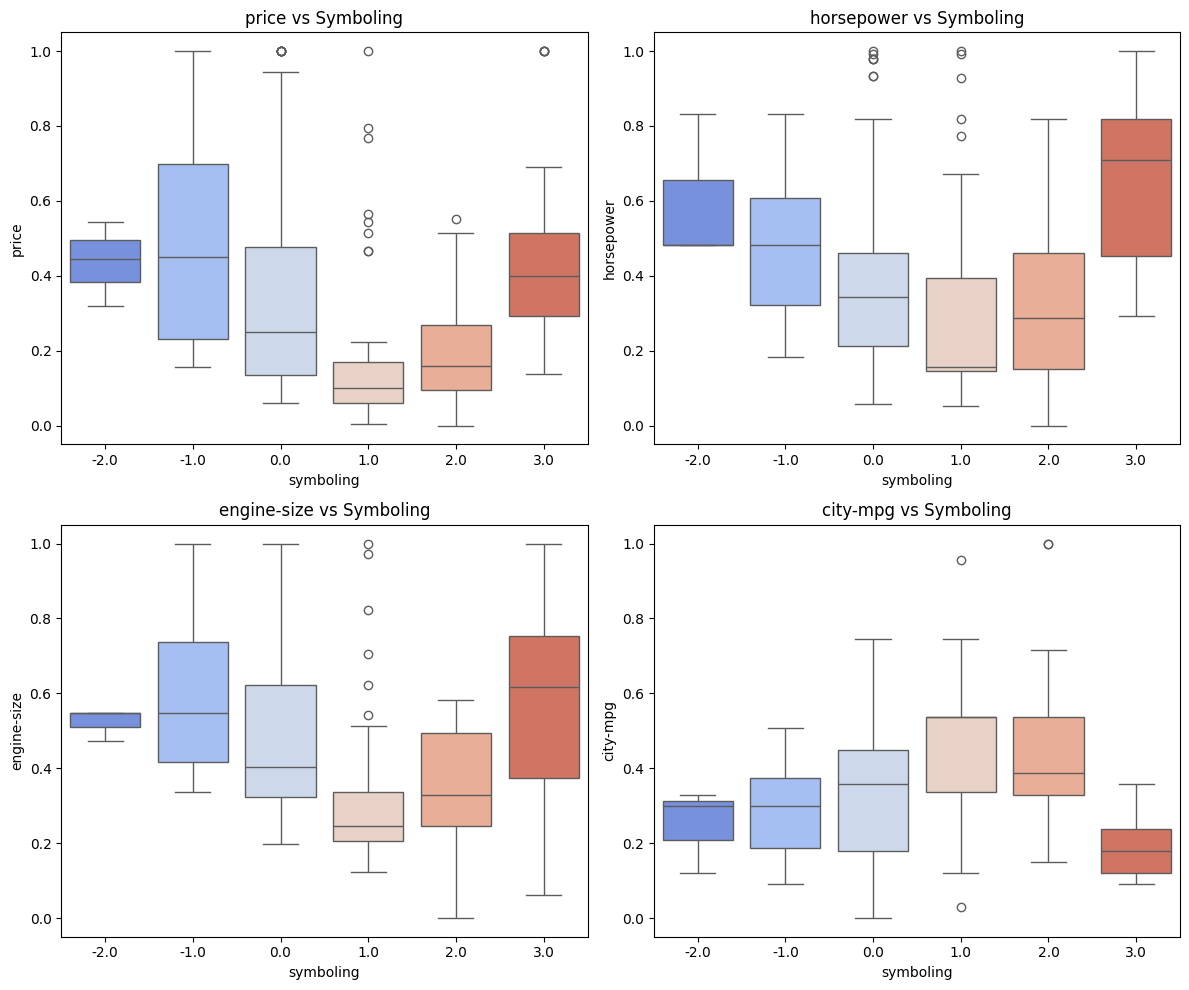

In [186]:
features = ['price', 'horsepower', 'engine-size', 'city-mpg']
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='symboling', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Symboling')
plt.tight_layout()
plt.show()

### 3. Data Preparation

#### 3.1 Encoding Fitur Kategorik

In [167]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder

In [168]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['symboling'])
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [169]:
X = df.drop(['symboling', 'risk_level'], axis=1)  # simbol dan target tidak ikut sebagai fitur
y = df['risk_level'].astype('category').cat.codes

In [170]:
categorical_cols = X.select_dtypes(include='object').columns

# --- One-hot encoding fitur kategorikal ---
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=42, stratify=y
)

## Model Development

#### Random Forest

In [171]:
from sklearn.model_selection import GridSearchCV

# --- Definisi model dasar
rf = RandomForestClassifier(random_state=42)

# --- Grid parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],           # jumlah pohon
    'max_depth': [None, 10, 20, 30],           # kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],           # minimal sampel untuk split
    'min_samples_leaf': [1, 2, 4],             # minimal sampel di daun
    'max_features': ['sqrt', 'log2', None]     # strategi pemilihan fitur
}

# --- Setup Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# --- Jalankan tuning
grid_search.fit(X_train, y_train)

# --- Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8238709677419356


#### Gradient Boosting

In [172]:
# Parameter grid
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Model dan GridSearch
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

#### XGBoost

In [173]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1]
}

# Model dan GridSearch
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]},
             scoring='accuracy')

#### AdaBoost

In [174]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5]
}

# Model dan GridSearch
ada_model = AdaBoostClassifier(random_state=42)
ada_grid = GridSearchCV(ada_model, ada_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model
ada_grid.fit(X_train, y_train)


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

## Evaluasi Model

#### Random Forest

In [175]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluasi hasil
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      0.83      0.90        23
           2       0.74      1.00      0.85        14

    accuracy                           0.88        52
   macro avg       0.89      0.90      0.88        52
weighted avg       0.91      0.88      0.89        52

Confusion Matrix:
[[13  0  2]
 [ 1 19  3]
 [ 0  0 14]]


#### XGBoost

In [176]:
# Evaluasi
print("=== Best XGBoost ===")
print("Best Params:", xgb_grid.best_params_)
print("Best Accuracy on CV:", xgb_grid.best_score_)

# Prediksi dan evaluasi di test set
y_pred_xgb = xgb_grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

=== Best XGBoost ===
Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy on CV: 0.8174193548387096
Test Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.87      0.93        23
           2       0.81      0.93      0.87        14

    accuracy                           0.92        52
   macro avg       0.92      0.93      0.92        52
weighted avg       0.93      0.92      0.92        52

Confusion Matrix:
 [[15  0  0]
 [ 0 20  3]
 [ 1  0 13]]


#### Gradient Boosting

In [177]:
# Evaluasi
print("=== Best Gradient Boosting ===")
print("Best Params:", gb_grid.best_params_)
print("Best Accuracy on CV:", gb_grid.best_score_)

# Prediksi dan evaluasi di test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_gb = gb_grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

=== Best Gradient Boosting ===
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy on CV: 0.8374193548387098
Test Accuracy: 0.9038461538461539
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       1.00      0.87      0.93        23
           2       0.81      0.93      0.87        14

    accuracy                           0.90        52
   macro avg       0.90      0.91      0.90        52
weighted avg       0.91      0.90      0.91        52

Confusion Matrix:
 [[14  0  1]
 [ 1 20  2]
 [ 1  0 13]]


#### AdaBoost

In [178]:
# Evaluasi
print("=== Best AdaBoost ===")
print("Best Params:", ada_grid.best_params_)
print("Best Accuracy on CV:", ada_grid.best_score_)

# Prediksi dan evaluasi di test set
y_pred_ada = ada_grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

=== Best AdaBoost ===
Best Params: {'learning_rate': 1.0, 'n_estimators': 200}
Best Accuracy on CV: 0.778494623655914
Test Accuracy: 0.8653846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       1.00      0.83      0.90        23
           2       0.72      0.93      0.81        14

    accuracy                           0.87        52
   macro avg       0.86      0.87      0.86        52
weighted avg       0.89      0.87      0.87        52

Confusion Matrix:
 [[13  0  2]
 [ 1 19  3]
 [ 1  0 13]]
